In [17]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import jovian

<IPython.core.display.Javascript object>

In [3]:
#Loading the data
df=pd.read_csv('fuel.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
#Let us select some particular features
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]

In [10]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


In [12]:
#plotting each of this features
viz=cdf[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_CITY']]

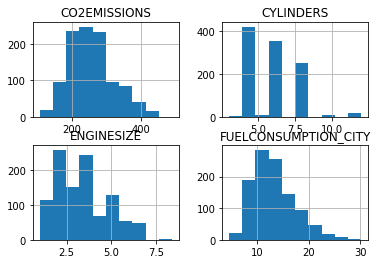

In [15]:
viz.hist()
plt.show()

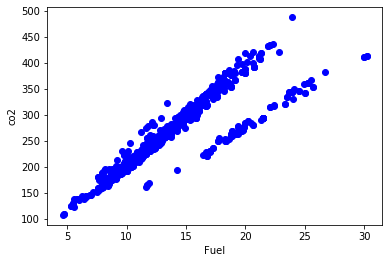

In [19]:
#To plot the feautures
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Fuel')
plt.ylabel('co2')
plt.show()

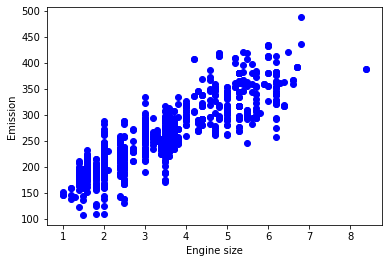

In [21]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [23]:
#Creating a train and test dataset
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

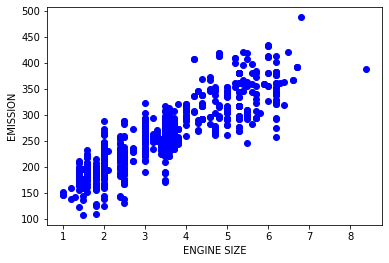

In [26]:
#Simple Regression model
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSION')
plt.show()

In [28]:
#MODELLING
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

coefficients: [[39.54176409]]
Intercept: [123.79946697]


Text(0, 0.5, 'Emission')

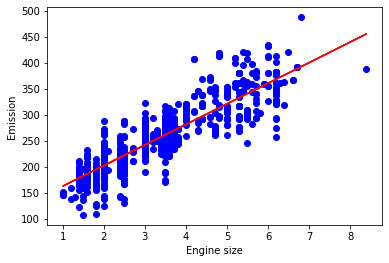

In [30]:
#plotting output
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.58
Residual sum of squares (MSE): 920.89
R2-score: 0.72


In [ ]:
jovian.commit()

[jovian] Saving notebook..


<IPython.core.display.Javascript object>